<a href="https://colab.research.google.com/github/SheikhAliTassadaq/DAY2-P2-House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [38]:
house_prediction_dataset = pd.read_csv("/content/BostonHousing.csv")

In [39]:
house_prediction_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
house_prediction_dataset.shape

(506, 14)

In [41]:
house_prediction_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [42]:
house_prediction_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

**CORRELATION**


1.   POSITIVE CORRELATION
2.   NEGATIVE CORRELATION



In [43]:
correlation = house_prediction_dataset.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

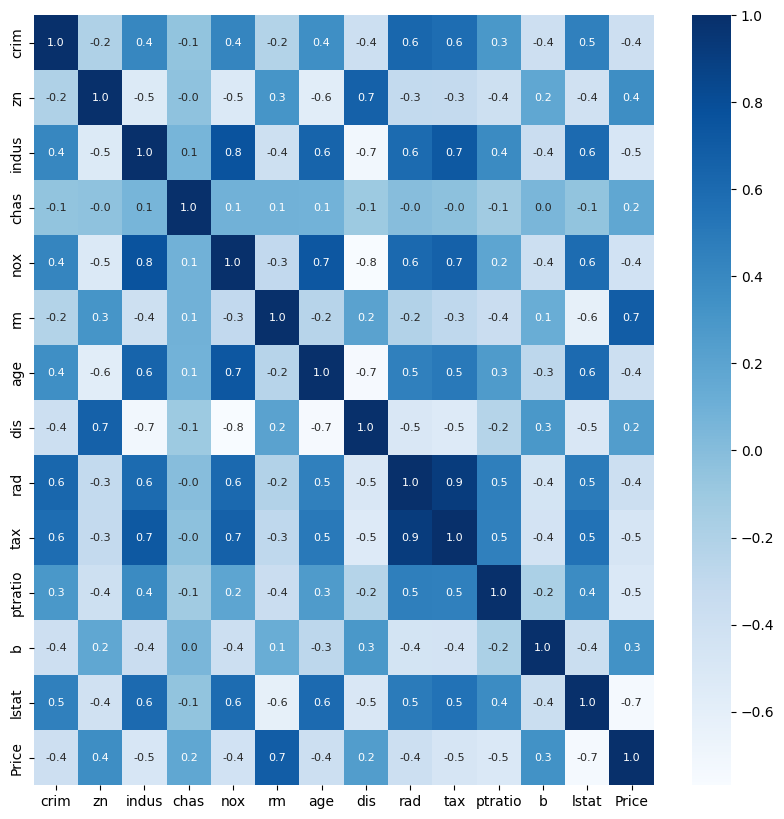

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')
plt.show

In [45]:
X = house_prediction_dataset.drop(['Price'], axis=1)
Y = house_prediction_dataset['Price']

In [46]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [47]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 12 )

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**THE MODEL FOR THIS PROJECT IS xgboost**

In [49]:
model = XGBRegressor()

In [50]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
train_predicted_values = model.predict(X_train)

In [52]:
print(train_predicted_values)

[30.686617  22.40959   20.310844  10.19921   11.988996  18.501152
 25.00544   29.803595  35.110672  23.209648  23.901857  13.897687
 23.993624  21.91256   50.01087   16.099815  30.767807  48.796665
 33.40101   17.795507  24.428314  46.709717  28.998362  24.111912
 22.202106  17.199608  32.993183  18.371376  22.909515  19.90016
  8.406501  20.490509  15.626932  24.605026   7.4008217 20.493982
 42.30319   17.888342  15.308985  22.296299  19.705452  19.100962
 14.108168  19.38804   17.196749  15.599608  18.210386  21.900373
 49.99143   20.906622  24.787497  19.888268  17.105413  22.107876
 11.919088  24.689882  31.703037  17.601826  22.597067  35.99493
 20.598972  16.19644   17.768902  21.371754  21.190641  10.218286
 13.788752  26.194906   8.291177  39.802     24.417799  26.606016
 11.808608  22.796469  14.604953  19.503826  10.901567  12.499357
 21.994196  12.291424   7.2199683 24.276688  41.28262   23.90283
 23.18734   19.608595  23.907042  21.010044  19.308779  21.404642
 27.086744  1

**PREDICTION FOR Train DATA USING r2_score**

In [64]:
score_1 = metrics.r2_score(Y_train,train_predicted_values)

In [65]:
print("the accuracy score is for r2 : " , score_1)

the accuracy score is for r2 :  0.9999975750649409


****VISUALIZATION OF TRAINING DATA****

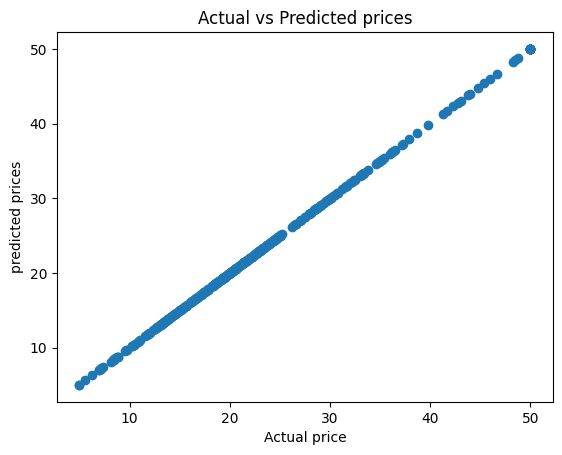

In [62]:
plt.scatter(Y_train,train_predicted_values)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

**PREDICTION FOR TEST DATA USING r2_score**

In [81]:

predicted_values_test = model.predict(X_test)

In [82]:
score_11 = metrics.r2_score(Y_test,predicted_values_test)
print("the accuracy score is for r2 : " , score_11)

the accuracy score is for r2 :  0.8570372970210138


**VISULAIZATION ACTUAL VS PREDICTED PRICES**

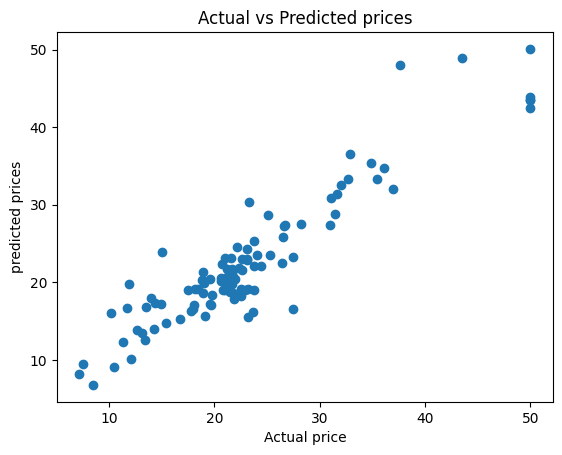

In [58]:
plt.scatter(Y_test,predicted_values_test)
plt.xlabel("Actual price")
plt.ylabel("predicted prices")
plt.title("Actual vs Predicted prices")
plt.show()

**PREDICTION FOR TRAIN DATA USING MEAN_SQUARED_ERROR**

In [83]:
score_2 = metrics.mean_squared_error(Y_train,train_predicted_values)

print("the accuracy score is for mse : " , score_2)

the accuracy score is for mse :  0.00020613241292994318


**PREDICTION FOR Test DATA USING MEAN_SQUARED_ERROR**

In [84]:
score_2 = metrics.mean_squared_error(Y_test,predicted_values_test)

print("the accuracy score is for mse : " , score_2)

the accuracy score is for mse :  11.68152478308935
